<a href="https://colab.research.google.com/github/amaliErandika/Data-Cleaning/blob/main/data_cleaning_process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Phase 1: Data Exploration and Assessment**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

**Task 1.1: Initial Data Inspection**

In [ ]:
df=pd.read_csv('/content/hotel_bookings.csv') #load the CSV file
print(df.head())

          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1     

In [ ]:
print("Dataset Shape:",df.shape)#Shape of the dataset

Dataset Shape: (119390, 32)


In [ ]:
print("Data types of each column", df.dtypes)#Data types of each column

Data types of each column hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent   

In [ ]:
print("First 5 rows:",df.head())#First 5 rows

First 5 rows:           hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Dep

In [ ]:
print("Last 5 rows", df.tail())#Last 5 rows

Last 5 rows              hotel  is_canceled  lead_time  arrival_date_year  \
119385  City Hotel            0         23               2017   
119386  City Hotel            0        102               2017   
119387  City Hotel            0         34               2017   
119388  City Hotel            0        109               2017   
119389  City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388            

In [ ]:
print("Basic statistical summary: ", df.describe(include='all'))#Basic statistical summary

Basic statistical summary:               hotel    is_canceled      lead_time  arrival_date_year  \
count       119390  119390.000000  119390.000000      119390.000000   
unique           2            NaN            NaN                NaN   
top     City Hotel            NaN            NaN                NaN   
freq         79330            NaN            NaN                NaN   
mean           NaN       0.370416     104.011416        2016.156554   
std            NaN       0.482918     106.863097           0.707476   
min            NaN       0.000000       0.000000        2015.000000   
25%            NaN       0.000000      18.000000        2016.000000   
50%            NaN       0.000000      69.000000        2016.000000   
75%            NaN       1.000000     160.000000        2017.000000   
max            NaN       1.000000     737.000000        2017.000000   

       arrival_date_month  arrival_date_week_number  \
count              119390             119390.000000   
unique   

**Task 1.2: Missing Value Analysis**

In [ ]:
#check for missing values
print("All columns with missing values: ")
missing_data = df.isnull().sum()
#Calculate the percentage of missing values
missing_precent = (missing_data / len(df)) *100
missing_summary = pd.DataFrame({
    'Missing_Count' : missing_data,
    'missing_precentage' : missing_precent
}).sort_values('Missing_Count', ascending=False)
print(missing_summary[missing_summary['Missing_Count']>0])

All columns with missing values: 
          Missing_Count  missing_precentage
company          112593           94.306893
agent             16340           13.686238
country             488            0.408744
children              4            0.003350


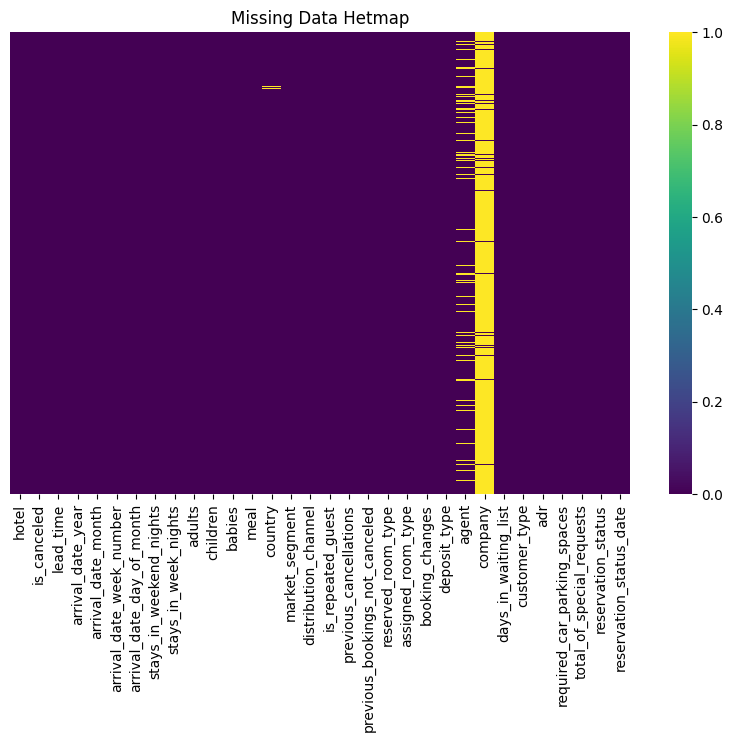

In [ ]:
#Visualise missing value patterns using a heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Data Hetmap')
plt.show()

**Task 1.3: Data Quality Assessment**

In [ ]:
#Count duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 31994


In [ ]:
#Identify potential outliers in numerical columns
#disply basic statistics
df.describe()[['lead_time','stays_in_weekend_nights','stays_in_week_nights','adults','children','babies','adr']]


,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,adr
count,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000
mean,104.011416,0.927599,2.500302,1.856403,0.103890,0.007949,101.831122
std,106.863097,0.998613,1.908286,0.579261,0.398561,0.097436,50.535790
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000
25%,18.000000,0.000000,1.000000,2.000000,0.000000,0.000000,69.290000
50%,69.000000,1.000000,2.000000,2.000000,0.000000,0.000000,94.575000
75%,160.000000,2.000000,3.000000,2.000000,0.000000,0.000000,126.000000
max,737.000000,19.000000,50.000000,55.000000,10.000000,10.000000,5400.000000


In [ ]:
#Examine categorical variables for inconsistencies
categorical_cols = ['hotel', 'meal', 'market_segment', 'distribution_channel','reserved_room_type', 'assigned_room_type', 'customer_type', 'deposit_type']
for col in categorical_cols:
  print(f"\nUnique values in '{col}':")
  print(df[col].value_counts(dropna=False))


Unique values in 'hotel':
hotel
City Hotel      79330
Resort Hotel    40060
Name: count, dtype: int64

Unique values in 'meal':
meal
BB    92310
HB    14463
SC    11819
FB      798
Name: count, dtype: int64

Unique values in 'market_segment':
market_segment
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: count, dtype: int64

Unique values in 'distribution_channel':
distribution_channel
TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: count, dtype: int64

Unique values in 'reserved_room_type':
reserved_room_type
A    85994
D    19201
E     6535
F     2897
G     2094
B     1118
C      932
H      601
P       12
L        6
Name: count, dtype: int64

Unique values in 'assigned_room_type':
assigned_room_type
A    74053
D    25322
E     7806
F     3751
G     2553
C     2375
B     2163
H      712
I    

In [ ]:
#Check for impossible or illogical values
#This is illogical, as there must be at least one guest.
df['total_guests'] = df['adults'] + df['children'] + df['babies']
invalid_guests = df[df['total_guests']==0]
print(f"Rows with 0 total guests: {len(invalid_guests)}")
display(invalid_guests.head())

Rows with 0 total guests: 180


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_guests
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,NaN,174.0,0,Transient-Party,0.0,0,0,Check-Out,2015-10-06,0.0
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,NaN,174.0,0,Transient,0.0,0,0,Check-Out,2015-10-12,0.0
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,38.0,NaN,0,Transient-Party,0.0,0,0,Check-Out,2015-11-23,0.0
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,308.0,NaN,122,Transient-Party,0.0,0,0,Check-Out,2016-01-04,0.0
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,308.0,NaN,122,Transient-Party,0.0,0,0,Check-Out,2016-01-05,0.0


In [ ]:
#Negative or zero adr values (unusual but not always invalid)
invalid_adr = df[df['adr']<0]
print(f"Rows with negative ADR: {len(invalid_adr)}")
display(invalid_adr.head())

Rows with negative ADR: 1


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_guests
14969,Resort Hotel,0,195,2017,March,10,5,4,6,2,...,273.0,NaN,0,Transient-Party,-6.38,0,0,Check-Out,2017-03-15,2.0


In [ ]:
#Negative stay durations
stay_columns = ['stays_in_weekend_nights','stays_in_week_nights']
for col in stay_columns:
  print(f"Rows with negative {col}: {len(df[df[col]<0])}")

Rows with negative stays_in_weekend_nights: 0
Rows with negative stays_in_week_nights: 0


**Phase 2: Data Cleaning Implementation**

**Task 2.1: Handling Missing Values**

In [ ]:
#Count of missing values in all columns
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

,0
children,4
country,488
agent,16340
company,112593
total_guests,4


In [ ]:
#Replace missing values in 'children' with 0
df['children'].fillna(0, inplace=True)
#Confirm it worked
print(f"Missing values in 'children': {df['children'].isnull().sum()}")

Missing values in 'children': 0


In [ ]:
#Country column
#Show missing value count
missing_country = df['country'].isnull().sum()
print(f"Missing 'country' values:{missing_country}")

Missing 'country' values:488


In [ ]:
# Compare rows with missing country
df[df['country'].isnull()].groupby(['hotel','market_segment']).size()

hotel         market_segment
City Hotel    Complementary       7
              Corporate           1
              Direct              1
              Groups              1
              Offline TA/TO      14
Resort Hotel  Complementary       2
              Corporate         183
              Direct            156
              Groups              4
              Offline TA/TO      45
              Online TA          74
dtype: int64

In [ ]:
#Fill with mode (most common country) or 'Unknown'
#option 1: Fill with most common country
most_common_country = df['country'].mode()[0]
df['country'].fillna(most_common_country,inplace=True)

# Confirm
print(f"Missing values in 'country': {df['country'].isnull().sum()}")

Missing values in 'country': 0


In [ ]:
#Agent Column – Replace NaN with 0
# Fill missing agent with 0 and convert to integer
df['agent'].fillna(0, inplace=True)
df['agent'] = df['agent'].astype(int)

# Confirm
print(f"Missing values in 'agent': {df['agent'].isnull().sum()}")

Missing values in 'agent': 0


In [ ]:
#Company Column – Replace NaN with 0
# Fill missing company with 0 and convert to integer
df['company'].fillna(0, inplace=True)
df['company'] = df['company'].astype(int)

# Confirm
print(f"Missing values in 'company': {df['company'].isnull().sum()}")

Missing values in 'company': 0


In [ ]:
#Final Check: Ensure All Missing Values Are Handled
columns_to_check = ['children', 'country', 'agent', 'company']
df[columns_to_check].isnull().sum()

,0
children,0
country,0
agent,0
company,0


**Task 2.2: Duplicate Detection and Removal**

In [ ]:
#check for exact duplicates
duplicates = df.duplicated()
print(f"Number of exact duplicates: {duplicates.sum()}")

Number of exact duplicates: 32013


In [ ]:
#Find near-duplicates (rows that are similar but not identical)
subset_cols = df.columns.difference(['assigned_room_type'])
near_duplicates = df.duplicated(subset_cols)
num_near_duplicates = near_duplicates.sum()
print(f"Number of near-duplicate rows (excluding 'assigned_room_type'): {num_near_duplicates}")

Number of near-duplicate rows (excluding 'assigned_room_type'): 33000


In [ ]:
#Decide on the removal strategy and implement it
# Remove exact duplicates
df_cleaned = df.drop_duplicates()

# Check new shape
print(f"Original rows: {df.shape[0]}")
print(f"Rows after removing exact duplicates: {df_cleaned.shape[0]}")

Original rows: 119390
Rows after removing exact duplicates: 87377


In [ ]:
#Document the number of duplicates removed
duplicates_removed = df.shape[0] - df_cleaned.shape[0]
print(f"Duplicates removed: {duplicates_removed}")

Duplicates removed: 32013


In [ ]:
#Final Step: Replace the original DataFrame
df = df_cleaned

**Task 2.3: Outlier Detection and Treatment**

In [ ]:
columns_to_check = [
    'lead_time',
    'stays_in_weekend_nights',
    'stays_in_week_nights',
    'adults',
    'children',
    'babies',
    'adr'
]

In [ ]:
#Use the IQR method for outlier detection
# define a function to detect outliers using the IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    print(f"{column}: {len(outliers)} outliers")
    return outliers

# detect outliers for each column
for col in columns_to_check:
    detect_outliers_iqr(df, col)

lead_time: 2396 outliers
stays_in_weekend_nights: 220 outliers
stays_in_week_nights: 1531 outliers
adults: 22887 outliers
children: 8364 outliers
babies: 914 outliers
adr: 2488 outliers


In [ ]:
#Apply z-score analysis
from scipy.stats import zscore

#compute z-scores for selected columns
z_scores = df[columns_to_check].apply(zscore)
outliers_z = (np.abs(z_scores) > 3).sum()

#print number of outliers based on z-score
print("\nZ-Score Method:")
for col, count in outliers_z.items():
  print(f"{col}: {count} outliers")


Z-Score Method:
lead_time: 1049 outliers
stays_in_weekend_nights: 290 outliers
stays_in_week_nights: 1531 outliers
adults: 76 outliers
children: 3669 outliers
babies: 914 outliers
adr: 626 outliers


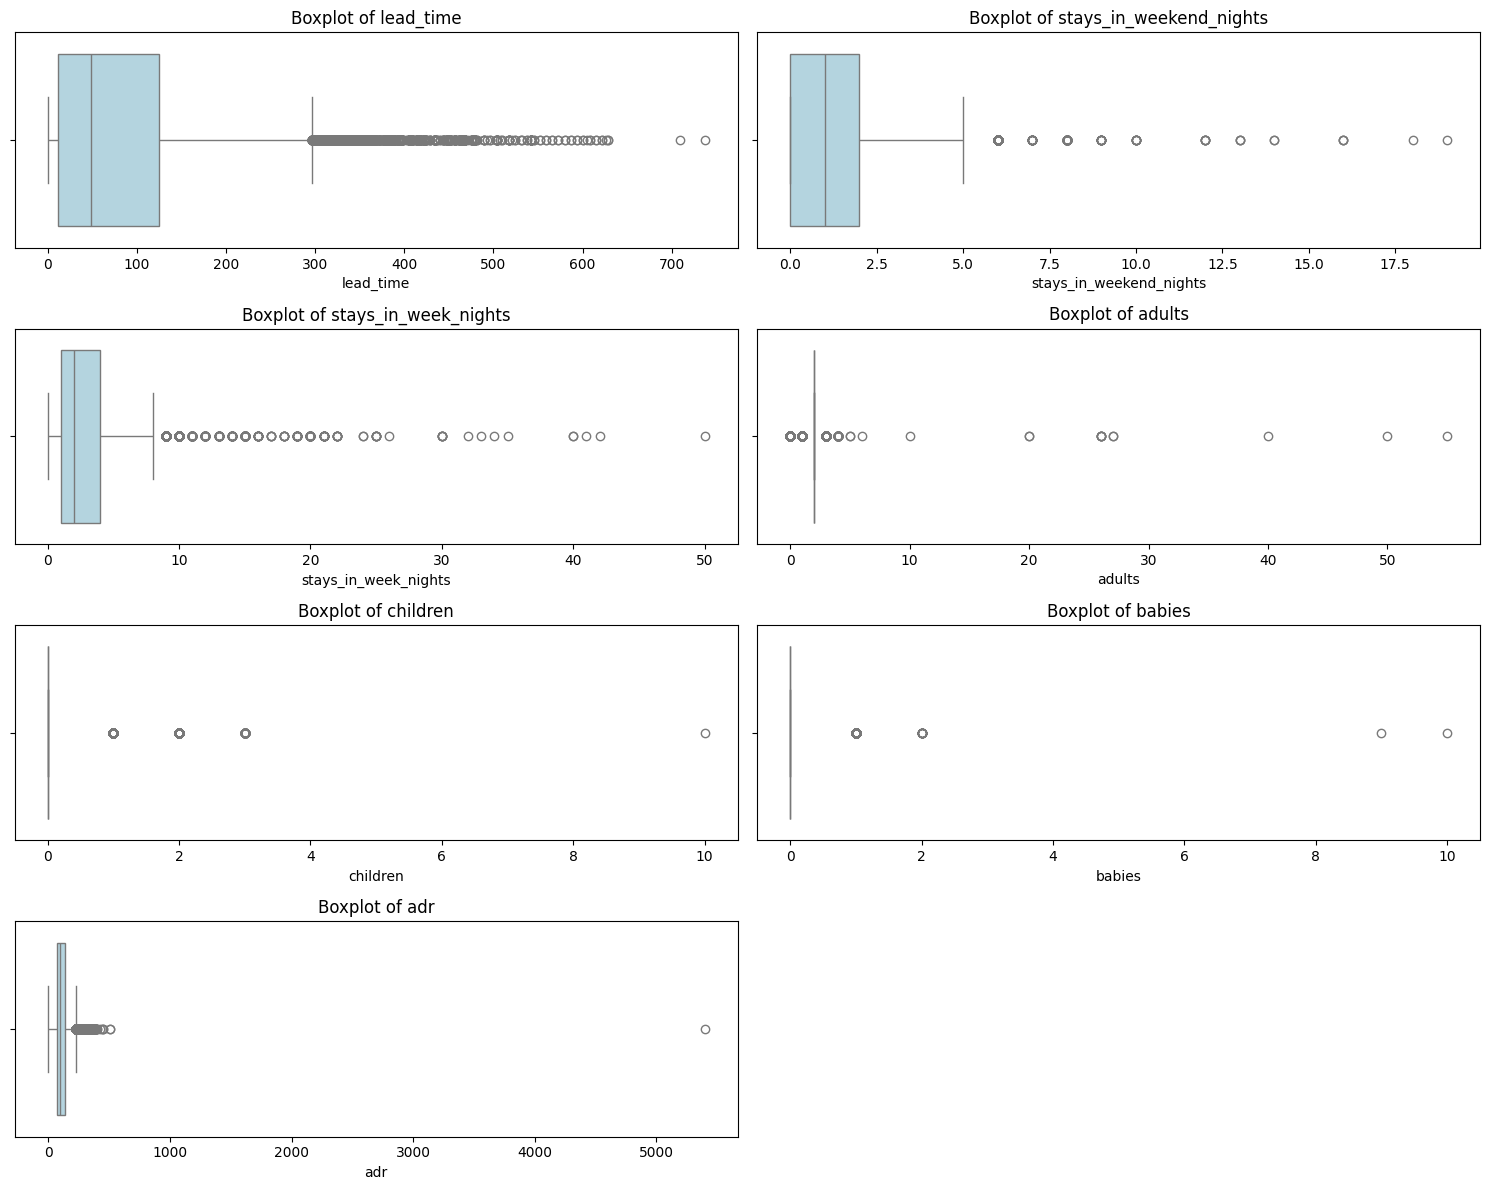

In [ ]:
#Create boxplots for visualisation
plt.figure(figsize=(15, 12))
for i, col in enumerate(columns_to_check):
    plt.subplot(4, 2, i + 1)
    sns.boxplot(x=df[col], color='lightblue')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [ ]:
#Decide on treatment strategy (removal, capping, or transformation)
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    before = df.shape[0]
    df = df[(df[column] >= lower) & (df[column] <= upper)]
    after = df.shape[0]
    print(f"{column}: Removed {before - after} rows")
    return df

# Apply to adr and lead_time
df = remove_outliers_iqr(df, 'adr')
df = remove_outliers_iqr(df, 'lead_time')

adr: Removed 2488 rows
lead_time: Removed 2361 rows


In [ ]:
#Capping Strategy
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] > upper, upper,
                 np.where(df[column] < lower, lower, df[column]))
    return df

# Example for 'babies' column
df = cap_outliers(df, 'babies')

**Task 2.4: Data Inconsistency Fixes**

In [ ]:
#Standardise categorical values (e.g., country codes)
# Check unique values in key categorical columns
categorical_cols = ['country', 'meal', 'market_segment', 'distribution_channel']

for col in categorical_cols:
    print(f"\nUnique values in {col}:\n", df[col].unique())


Unique values in country:
 ['GBR' 'PRT' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV'
 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT'
 'NGA' 'VEN' 'MDV' 'SVK' 'KAZ' 'IDN' 'LBN' 'PHL' 'SYC' 'AZE' 'BHR' 'NZL'
 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB' 'CMR' 'BIH' 'MUS' 'COM'
 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI' 'SAU' 'VNM' 'PLW' 'QAT'
 'EGY' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB' 'NPL' 'BHS' 'PAK' 'MAC' 'TGO'
 'TWN' 'STP' 'SEN' 'PER' 'KNA' 'ETH' 'IRQ' 'HND' 'RWA' 'KHM' 'MCO' 'BGD'
 'IMN' 'TJK' 'NIC' 'BEN' 'VGB' 'TZA' 'GAB' 'GHA' 'TMP' 'GLP' 'KEN' 'LIE'
 'GNB' 'MNE' 'UMI' 'MYT' 'MMR' 'PAN' 'BFA' 'LBY' 'MLI' 'NAM' 'BOL' 'PRY'
 'BRB' 'ABW' 'SLV' 'DMA'

In [ ]:
#Fix date format inconsistencies
# Convert 'arrival_date_month' to numeric
import datetime

df['arrival_date'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' +
                                     df['arrival_date_month'] + '-' +
                                     df['arrival_date_day_of_month'].astype(str),
                                     format='%Y-%B-%d', errors='coerce')

# Check for any parsing errors
print("Date parsing errors:", df['arrival_date'].isnull().sum())

Date parsing errors: 0


In [ ]:
#Handle impossible combinations
#identify invalid guest combinations
invalid_guests = df[(df['adults']==0) & (df['children']==0) & (df['babies'] ==0)]
print("Number of impossible guest records:", len(invalid_guests))
#Remove those rows
df = df[~((df['adults'] == 0) & (df['children'] == 0) & (df['babies'] == 0))]

Number of impossible guest records: 164


In [ ]:
#Validate logical constraints
# Remove rows with negative adr
invalid_adr = df[df['adr'] < 0]
print("Negative ADR records:", len(invalid_adr))
df = df[df['adr'] >= 0]

# Check for negative stays
negative_stays = df[(df['stays_in_weekend_nights'] < 0) | (df['stays_in_week_nights'] < 0)]
print("Negative stay duration records:", len(negative_stays))
df = df[(df['stays_in_weekend_nights'] >= 0) & (df['stays_in_week_nights'] >= 0)]

# Check for negative lead_time
df = df[df['lead_time'] >= 0]

Negative ADR records: 1
Negative stay duration records: 0


In [ ]:
# Check shape and data summary after all fixes
print("Final cleaned dataset shape:", df.shape)
df.info()

Final cleaned dataset shape: (82363, 34)
<class 'pandas.core.frame.DataFrame'>
Index: 82363 entries, 2 to 119389
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           82363 non-null  object        
 1   is_canceled                     82363 non-null  int64         
 2   lead_time                       82363 non-null  int64         
 3   arrival_date_year               82363 non-null  int64         
 4   arrival_date_month              82363 non-null  object        
 5   arrival_date_week_number        82363 non-null  int64         
 6   arrival_date_day_of_month       82363 non-null  int64         
 7   stays_in_weekend_nights         82363 non-null  int64         
 8   stays_in_week_nights            82363 non-null  int64         
 9   adults                          82363 non-null  int64         
 10  children                        8

**Phase 3: Data Validation and Documentation**

**Task 3.1: Data Integrity Checks**

In [ ]:
#Verify that total guests (adults + children + babies) > 0
# Create a new column for total guests
df['total_guests'] = df['adults'] + df['children'] + df['babies']

# Check for records with 0 total guests
zero_guest_rows = df[df['total_guests'] == 0]
print("Rows with zero guests:", len(zero_guest_rows))

# Remove those records if any remain
df = df[df['total_guests'] > 0]

Rows with zero guests: 0


In [ ]:
#Check that arrival dates are within the expected range
# Check min and max of the constructed arrival_date column
print("Earliest arrival date:", df['arrival_date'].min())
print("Latest arrival date:", df['arrival_date'].max())

# Filter out any rows outside the expected year range
df = df[(df['arrival_date'].dt.year >= 2015) & (df['arrival_date'].dt.year <= 2017)]

Earliest arrival date: 2015-07-01 00:00:00
Latest arrival date: 2017-08-31 00:00:00


In [ ]:
#Validate that numerical values are within reasonable ranges
# Describe numerical features
df[['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights','adults', 'children', 'babies', 'adr']].describe()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,adr
count,82363.000000,82363.00000,82363.000000,82363.000000,82363.000000,82363.0,82363.000000
mean,72.451246,0.99104,2.579629,1.865971,0.118245,0.0,102.255364
std,73.639574,1.01838,2.018174,0.503158,0.417110,0.0,45.182067
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000
25%,11.000000,0.00000,1.000000,2.000000,0.000000,0.0,71.865000
50%,46.000000,1.00000,2.000000,2.000000,0.000000,0.0,97.000000
75%,117.000000,2.00000,3.000000,2.000000,0.000000,0.0,130.500000
max,296.000000,19.00000,50.000000,4.000000,10.000000,0.0,227.000000


In [ ]:
#Ensure categorical values are from expected sets
# Check unique values against expected sets
expected_meals = {'BB', 'FB', 'HB', 'SC'}
unexpected_meals = set(df['meal'].unique()) - expected_meals
print("Unexpected meal types:", unexpected_meals)

# Fix if needed (already done previously)
df['meal'] = df['meal'].replace('Undefined', 'SC')

# Market segment validation
expected_segments = {'Online TA', 'Offline TA/TO', 'Direct', 'Groups', 'Corporate', 'Complementary', 'Aviation'}
unexpected_segments = set(df['market_segment'].unique()) - expected_segments
print("Unexpected market segments:", unexpected_segments)

Unexpected meal types: set()
Unexpected market segments: {'Undefined'}


**Task 3.3: Final Dataset Preparation**

In [ ]:
#Create the final cleaned dataset
import pandas as pd
# Preview the final cleaned dataset
df_cleaned.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_guests
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240,0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2.0


In [ ]:
#Export to CSV with an appropriate naming convention
df_cleaned.to_csv('hotel_bookings_cleaned.csv', index=False)
from google.colab import files
files.download('hotel_bookings_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**After Cleaning**

In [ ]:
df_cleaned.shape

(87377, 33)

In [ ]:
#Count of Duplicates Removed
before = df.shape[0]  # original row count
df_cleaned = df.drop_duplicates()
after = df_cleaned.shape[0]
duplicates_removed = before - after
print("Duplicates removed:", duplicates_removed)

Duplicates removed: 7


In [ ]:
df_cleaned.isnull().sum().sum() #Check Missing Values Remaining

np.int64(0)

In [ ]:
#Count of Invalid Rows Removed
df_cleaned = df_cleaned[~((df_cleaned['adults'] == 0) &
                          (df_cleaned['children'] == 0) &
                          (df_cleaned['babies'] == 0))]

In [ ]:
invalid_rows_removed = before - df_cleaned.shape[0]
print("Invalid rows removed:", invalid_rows_removed)

Invalid rows removed: 7
